In [23]:
import requests
from tqdm import tqdm

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
def fetch_data(url, destination):
    response = requests.get(url, stream=True)
    with open(f"../data/validation/{destination}.csv", "wb") as handle:
        for data in tqdm(response.iter_content()):
            handle.write(data)

In [22]:
url_ts_metabolomics = "https://raw.githubusercontent.com/JBEI/KineticLearning/master/data/time_series_metabolomics.csv"
url_ts_proteomics = "https://raw.githubusercontent.com/JBEI/KineticLearning/master/data/time_series_proteomics.csv"
fetch_data(url_ts_metabolomics, "ts_metabolomics")
fetch_data(url_ts_proteomics, "ts_proteomics")

13888it [00:00, 53423.76it/s]
255850it [00:05, 49804.02it/s]


In [24]:
df_ts_metabolomics = pd.read_csv("../data/validation/ts_metabolomics.csv")
df_ts_proteomics = pd.read_csv("../data/validation/ts_proteomics.csv")

In [48]:
df_ts_metabolomics[df_ts_metabolomics['Strain'] == 'I1']

,Hour,Strain,Sample,OD600,Intracellular volume / sample,Glucose g/L,Pyruvate g/L,Succinate g/L,Lactate g/L,Formate g/L,...,Acetyl-CoA extracellular (uM),Acetoacetyl-CoA extracellular (uM),HMG-CoA extracellular (uM),AMP extracellular (uM),ADP extracellular (uM),ATP extracellular (uM),NAD extracellular (uM),NADH extracellular (uM),NADP extracellular (uM),NADPH extracellular (uM)
0,0,I1,1,1.659609,8.300000e-07,10.58700,0.049284,0.011400,0.052400,0.064700,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,I1,10,NaN,NaN,9.50113,0.005116,0.234701,0.397980,0.252576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,I1,19,2.240000,5.600000e-07,8.67278,0.003931,0.225041,0.607947,0.094819,...,0.213579,0.0,1.687138,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,6,I1,28,NaN,NaN,8.06414,0.009759,0.228584,0.869934,0.127715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,I1,37,2.690000,6.730000e-07,7.25209,0.063345,0.235512,1.200590,0.134617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10,I1,46,NaN,NaN,6.79263,0.076934,0.234670,1.281510,0.162665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12,I1,55,2.816000,7.040000e-07,6.76443,0.076668,0.228230,1.273880,0.151903,...,0.259026,0.0,1.654095,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,16,I1,64,NaN,NaN,6.25114,0.073498,0.217988,1.226390,0.158473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18,I1,73,2.865000,7.160000e-07,6.21977,0.068048,0.226201,1.241520,0.145736,...,0.335360,0.0,1.161652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,20,I1,82,NaN,NaN,5.98454,0.056594,0.222170,1.201530,0.143682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_ts_metabolomics['Sample'].unique()

array([  1,  10,  19,  28,  37,  46,  55,  64,  73,  82,  91, 100, 109,
       118,   2,  11,  20,  29,  38,  47,  56,  65,  74,  83,  92, 101,
       110, 119,   3,  12,  21,  30,  39,  48,  57,  66,  75,  84,  93,
       102, 111, 120,   4,  13,  22,  31,  40,  49,  58,  67,  76,  85,
        94, 103, 112, 121,   5,  14,  23,  32,  41,  50,  59,  68,  77,
        86,  95, 104, 113, 122,   6,  15,  24,  33,  42,  51,  60,  69,
        78,  87,  96, 105, 114, 123,   7,  16,  25,  34,  43,  52,  61,
        70,  79,  88,  97, 106, 115, 124,   8,  17,  26,  35,  44,  53,
        62,  71,  80,  89,  98, 107, 116, 125,   9,  18,  27,  36,  45,
        54,  63,  72,  81,  90,  99, 108, 117, 126])

In [36]:
df_ts_metabolomics.columns

Index(['Hour', 'Strain', 'Sample', 'OD600', 'Intracellular volume / sample',
       'Glucose g/L', 'Pyruvate g/L', 'Succinate g/L', 'Lactate g/L',
       'Formate g/L', 'Acetate g/L', 'Isopentenol g/L', 'Bisabolene g/L',
       'Limonene g/L', 'Acetoacetyl-coA (uM)', 'HMG-CoA (uM)',
       'Intracellular Mevalonate (uM)', 'Mev-P (uM)', 'IPP/DMAPP (uM)',
       'IP (uM)', 'GPP (uM)', 'FPP (uM)', 'AMP (uM)', 'ADP (uM)', 'ATP (uM)',
       'NAD (uM)', 'NADP (uM)', 'Acetyl-CoA (uM)', 'Fru-1,6-BiP (uM)',
       '3-P Glycerate (uM)', 'PEP (uM)', 'Pyruvate (uM)', 'lactate (uM)',
       'fumarate (uM)', 'succinate (uM)', 'oxaloacetate (uM)', 'malate (uM)',
       'oxoglutarate (uM)', 'cis-aconitate (uM)', 'citrate (uM)',
       'isocitrate (uM)', 'Glyoxylate (uM)', 'Glycolate (uM)', 'DXP', 'MEP',
       'HDMAPP', 'ME-cPP', 'CDP-ME', 'Glycine', 'Alanine', 'Serine', 'Proline',
       'Valine', 'Threonine', 'Cysteine', 'Leucine', 'Isoleucine',
       'Asparagine', 'Aspartate', 'Glutamine', 'Lysin

<AxesSubplot:xlabel='Pyruvate g/L', ylabel='Lactate g/L'>

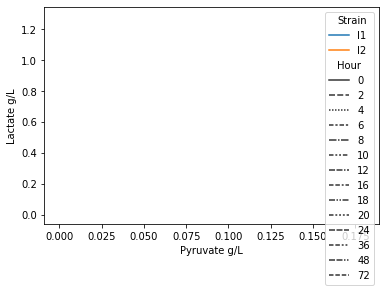

In [51]:
sns.lineplot(
    data=_df,
    x='Pyruvate g/L',
    y='Lactate g/L',
    hue='Strain',
    style='Hour'
)

<AxesSubplot:xlabel='Pyruvate g/L', ylabel='Lactate g/L'>

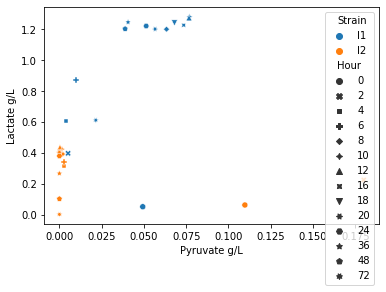

In [53]:
_df = df_ts_metabolomics[(df_ts_metabolomics['Strain'] == 'I1') | (df_ts_metabolomics['Strain'] == 'I2')]

sns.scatterplot(
    data=_df,
    x='Pyruvate g/L',
    y='Lactate g/L',
    hue='Strain',
    style='Hour'
)

In [28]:
df_ts_proteomics.columns

Index(['Sample Name', 'Hour', 'Organism', 'Strain', 'Replicate', 'Protein',
       'Protein name', 'Pathway', 'Peptide', 'PeptideArea',
       'PeptideCorrectedArea', 'PeptideCorrectedArea Normalized to AmpR',
       'PeptideCorrectedArea Normalized to Cam',
       'PeptideCorrectedArea Normalized to BSA', 'ProteinArea',
       'ProteinArea Normalized to AmpR', 'ProteinArea Normalized to Cam',
       'ProteinArea Normalized to BSA', 'PrecursorMz', 'PrecursorCharge',
       'RetentionTime', 'Background', 'PeakRank'],
      dtype='object')

In [32]:
pd.unique(df_ts_proteomics[['Organism', 'Strain']].values.ravel('K'))

array(['Escherichia coli', nan, 'Saccharomyces cerevisiae',
       'Staphylococcus aureus', 'I1', 'I2', 'I3', 'B1', 'B2', 'L1', 'L2',
       'L3', 'DH1'], dtype=object)

In [33]:
df_ts_proteomics

,Sample Name,Hour,Organism,Strain,Replicate,Protein,Protein name,Pathway,Peptide,PeptideArea,...,PeptideCorrectedArea Normalized to BSA,ProteinArea,ProteinArea Normalized to AmpR,ProteinArea Normalized to Cam,ProteinArea Normalized to BSA,PrecursorMz,PrecursorCharge,RetentionTime,Background,PeakRank
0,1,0,Escherichia coli,I1,1,AtoB,NaN,Mevalonate Pathway,LGDGQVYDVILR,4193.0,...,0.013469,3709.5,0.0268,0.0096,0.0119,0,0,0,0,0
1,1,0,Escherichia coli,I1,1,AtoB,NaN,Mevalonate Pathway,TFVFSQDEFPK,3226.0,...,0.010363,3709.5,0.0268,0.0096,0.0119,0,0,0,0,0
2,1,0,NaN,I1,1,Bisabolene,NaN,Mevalonate Pathway,ASQLAFPGENILDEAK,2350.0,...,0.007549,2123.0,0.0153,0.0055,0.0068,0,0,0,0,0
3,1,0,NaN,I1,1,Bisabolene,NaN,Mevalonate Pathway,YNVSPAIFDNFK,1896.0,...,0.006090,2123.0,0.0153,0.0055,0.0068,0,0,0,0,0
4,1,0,Saccharomyces cerevisiae,I1,1,HMGR,NaN,Mevalonate Pathway,SDVSALVELNIAK,20573.0,...,0.061765,67829.0,0.4895,0.1761,0.2179,0,0,0,1345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13434,89,72,NaN,DH1,89,AMPR,NaN,Antibiotic Marker,SALPAGWFIADK,1937.0,...,0.006884,2196.0,1.0000,1.8407,0.0078,0,0,0,0,0
13435,89,72,NaN,DH1,89,AMPR,NaN,Antibiotic Marker,VGYIELDLNSGK,2455.0,...,0.008725,2196.0,1.0000,1.8407,0.0078,0,0,0,0,0
13436,89,72,NaN,DH1,89,Cam,NaN,Antibiotic Marker,FYPAFIHILAR,1201.0,...,0.004268,1193.0,0.5433,1.0000,0.0042,0,0,0,0,0
13437,89,72,NaN,DH1,89,Cam,NaN,Antibiotic Marker,ITGYTTVDISQWHR,1185.0,...,0.004211,1193.0,0.5433,1.0000,0.0042,0,0,0,0,0


In [27]:
df_ts_proteomics[df_ts_proteomics['Organism'] == "Saccharomyces cerevisiae"]

,Sample Name,Hour,Organism,Strain,Replicate,Protein,Protein name,Pathway,Peptide,PeptideArea,...,PeptideCorrectedArea Normalized to BSA,ProteinArea,ProteinArea Normalized to AmpR,ProteinArea Normalized to Cam,ProteinArea Normalized to BSA,PrecursorMz,PrecursorCharge,RetentionTime,Background,PeakRank
4,1,0,Saccharomyces cerevisiae,I1,1,HMGR,NaN,Mevalonate Pathway,SDVSALVELNIAK,20573.0,...,0.061765,67829.0,0.4895,0.1761,0.2179,0,0,0,1345,0
5,1,0,Saccharomyces cerevisiae,I1,1,HMGR,NaN,Mevalonate Pathway,SVVAEATIPGDVVR,116430.0,...,0.374001,67829.0,0.4895,0.1761,0.2179,0,0,0,0,0
6,1,0,Saccharomyces cerevisiae,I1,1,HMGS,NaN,Mevalonate Pathway,GLVSDPAGSDALNVLK,7290.0,...,0.023417,7775.0,0.0561,0.0202,0.0250,0,0,0,0,0
7,1,0,Saccharomyces cerevisiae,I1,1,HMGS,NaN,Mevalonate Pathway,LEVGTETLIDK,8260.0,...,0.026533,7775.0,0.0561,0.0202,0.0250,0,0,0,0,0
14,1,0,Saccharomyces cerevisiae,I1,1,MK,NaN,Mevalonate Pathway,QQIDDLLLPGNTNLPWTS,17328.0,...,0.055662,37907.5,0.2736,0.0984,0.1218,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13303,89,72,Saccharomyces cerevisiae,DH1,89,MK,NaN,Mevalonate Pathway,SLVFQLFENK,1803.0,...,0.006408,1829.0,0.8329,1.5331,0.0065,0,0,0,0,0
13306,89,72,Saccharomyces cerevisiae,DH1,89,PMD,NaN,Mevalonate Pathway,DASLPTLSQWK,2719.0,...,0.009663,1849.0,0.8420,1.5499,0.0066,0,0,0,0,0
13307,89,72,Saccharomyces cerevisiae,DH1,89,PMD,NaN,Mevalonate Pathway,LYQLPQSTSEISR,979.0,...,0.003479,1849.0,0.8420,1.5499,0.0066,0,0,0,0,0
13308,89,72,Saccharomyces cerevisiae,DH1,89,PMK,NaN,Mevalonate Pathway,VQWLDVTQADWGVR,1089.0,...,0.003870,5719.5,2.6045,4.7942,0.0203,0,0,0,0,0
